## 유형별 임대주택 설계 시 단지 내 적정 주차 수요를 예측

In [16]:
#https://dacon.io/competitions/official/235745/data

In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [18]:
train = pd.read_csv("C:/Users/LG/Desktop/train.csv",encoding="cp949")
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [19]:
age = pd.read_csv("C:/Users/LG/Desktop/age_gender_info.csv",encoding="cp949")
age.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [20]:
test = pd.read_csv("C:/Users/LG/Desktop/test.csv",encoding="cp949")
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


## +) 전용면적별 세대수합

In [21]:
add = pd.read_csv("C:/Users/LG/Desktop/전용면적별세대수합.csv")
add.head()

,x,y
0,149,116
1,149,30
2,441,232
3,441,232
4,441,60


In [22]:
train_add=add["x"]
test_add=add["y"]
test_add=test_add.loc[0:1021]
train_add

0       149
1       149
2       441
3       441
4       441
       ... 
2947     19
2948     34
2949     34
2950    114
2951     19
Name: x, Length: 2952, dtype: int64

In [23]:
train=pd.concat([train,train_add],axis=1)
train.rename(columns={"x":"전용면적별세대수합"},inplace=True)
train.head(20)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,149
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,149
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,441
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,441
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,441
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,224
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,224
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000,214270,0.0,3.0,1425.0,1015.0,86
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0,276
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,80


In [24]:
test=pd.concat([test,test_add],axis=1)
test.rename(columns={"y":"전용면적별세대수합"},inplace=True)
test.tail(20)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수합
1002,C1266,596,아파트,충청북도,국민임대,37.45,272,35.0,H,15709000,212500,0.0,1.0,593.0,304
1003,C1266,596,아파트,충청북도,국민임대,37.45,32,35.0,H,15709000,212500,0.0,1.0,593.0,304
1004,C1266,596,아파트,충청북도,국민임대,46.33,107,35.0,H,24190000,274570,0.0,1.0,593.0,107
1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,-,-,0.0,1.0,40.0,66
1006,C2152,120,아파트,강원도,영구임대,33.84,54,9.0,C,-,-,0.0,1.0,40.0,54
1007,C1267,675,아파트,경상남도,국민임대,24.87,28,38.0,H,6882000,104370,0.0,1.0,467.0,28
1008,C1267,675,아파트,경상남도,국민임대,24.99,90,38.0,H,6882000,104370,0.0,1.0,467.0,102
1009,C1267,675,아파트,경상남도,국민임대,24.99,12,38.0,H,6882000,104370,0.0,1.0,467.0,102
1010,C1267,675,아파트,경상남도,국민임대,46.72,68,38.0,H,24420000,219230,0.0,1.0,467.0,180
1011,C1267,675,아파트,경상남도,국민임대,46.72,112,38.0,H,24420000,219230,0.0,1.0,467.0,180


### < 데이터 오류에 해당하는 행 지우기 >

In [25]:
train.loc[train['단지코드'] == 'C1004']['전용면적별세대수'].sum()

521

In [26]:
(train.groupby(['단지코드'])['전용면적별세대수'].sum() != 
 train.groupby(['단지코드'])['총세대수'].max()).sum()

40

In [27]:
train_apart = train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']].loc[train['임대건물구분'] == '아파트']
train_shop = train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형']].loc[train['임대건물구분'] == '상가']
train_danji = train[['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']].drop_duplicates()

In [28]:
train_danji.set_index('단지코드').loc[(train.groupby(['단지코드'])['전용면적별세대수'].sum() != 
 train.groupby(['단지코드'])['총세대수'].max())]

#총세대수는 상가 세대수까지 합친 숫자
#하지만 총세대수와 전용면적별 세대수 합이 맞지 않는 단지가 40개 단지 있음

,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,
C1925,601,강원도,9.0,0.0,4.0,117.0,75.0
C1312,518,충청남도,12.0,NaN,3.0,527.0,359.0
C2013,595,경상남도,3.0,0.0,3.0,509.0,91.0
C1424,625,대전광역시,2.0,NaN,7.0,517.0,179.0
C2520,970,대전광역시,2.0,NaN,2.0,420.0,386.0
C2319,606,대전광역시,1.0,1.0,12.0,548.0,266.0
C1850,388,경상남도,0.0,0.0,4.0,226.0,254.0
C1068,806,충청남도,11.0,NaN,2.0,804.0,510.0
C2644,779,충청남도,7.0,NaN,12.0,190.0,177.0


In [29]:
unmatch_danji_list = list(train_danji.set_index('단지코드').loc[(train.groupby(['단지코드'])['전용면적별세대수'].sum() != 
 train.groupby(['단지코드'])['총세대수'].max())].index)

In [30]:
train.loc[train['단지코드'].isin(unmatch_danji_list)].head()

#상가가 누락되어 부족한 것은 아니고 오류인 것으로 보임

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합
86,C1925,601,아파트,강원도,영구임대,26.37,298,9.0,C,8052000,130850,0.0,4.0,117.0,75.0,298
87,C1925,601,아파트,강원도,영구임대,31.32,298,9.0,C,9174000,144460,0.0,4.0,117.0,75.0,298
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,3
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,3
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,3


In [31]:
# 1번 데이터 오류
# 가장 큰 차이를 보이는 단지 4개를 삭제 
#train = train[train.단지코드 != 'C1804']
#train = train[train.단지코드 != 'C2405']
#train = train[train.단지코드 != 'C1740']
#train = train[train.단지코드 != 'C1206']

In [32]:
#2번 데이터오류 
train = train[train.단지코드 != 'C2085']
train = train[train.단지코드 != 'C1397']
train = train[train.단지코드 != 'C2431']
train = train[train.단지코드 != 'C1649']
train = train[train.단지코드 != 'C1036']

# 3번 데이터 오류 
train = train[train.단지코드 != 'C1095']
train = train[train.단지코드 != 'C2051']
train = train[train.단지코드 != 'C1218']
train = train[train.단지코드 != 'C1894']
train = train[train.단지코드 != 'C2483']
train = train[train.단지코드 != 'C1502']
train = train[train.단지코드 != 'C1988']

### < 변수 살펴보기 >

In [33]:
# https://dacon.io/competitions/official/235745/codeshare/2853?page=1&dtype=recent

In [34]:
train.shape, test.shape, age.shape, #행,열 수 확인

((2869, 16), (1022, 15), (16, 23))

### 1) train/test

In [35]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2869.0,887.654235,517.795084,26.00,514.0,775.00,1105.00,2568.0
전용면적,2869.0,44.421394,32.072217,12.62,32.1,39.84,51.05,583.4
전용면적별세대수,2869.0,102.699895,133.287517,1.00,14.0,60.00,142.00,1865.0
공가수,2869.0,12.915999,10.679931,0.00,4.0,11.00,20.00,55.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),2662.0,0.181818,0.432606,0.00,0.0,0.00,0.00,3.0
도보 10분거리 내 버스정류장 수,2869.0,3.709655,2.676486,0.00,2.0,3.00,4.00,20.0
단지내주차면수,2869.0,591.934472,391.292702,13.00,277.0,500.00,812.00,1798.0
등록차량수,2869.0,550.127571,430.465261,13.00,209.0,479.00,761.00,2550.0
전용면적별세대수합,2869.0,174.876264,190.899726,1.00,32.0,128.00,246.00,1885.0


In [36]:
test.describe().T
# train과 test 의 평균과 편차가 큰 차이가 없음

,count,mean,std,min,25%,50%,75%,max
총세대수,1022.0,862.080235,536.340894,75.00,488.000,745.00,1161.0,2572.0
전용면적,1022.0,43.706311,35.890759,9.96,33.135,39.72,47.4,583.4
전용면적별세대수,1022.0,100.414873,125.997855,1.00,14.000,60.00,140.0,1341.0
공가수,1022.0,15.544031,11.070140,0.00,6.000,15.00,23.0,45.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),980.0,0.136735,0.435500,0.00,0.000,0.00,0.0,2.0
도보 10분거리 내 버스정류장 수,1022.0,4.626223,5.414568,1.00,2.000,3.00,5.0,50.0
단지내주차면수,1022.0,548.771037,342.636703,29.00,286.000,458.00,711.0,1696.0
전용면적별세대수합,1022.0,168.409980,200.201155,1.00,29.250,116.00,232.0,1635.0


In [37]:
train_apart = train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']].loc[train['임대건물구분'] == '아파트']
train_shop = train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형']].loc[train['임대건물구분'] == '상가']
train_danji = train[['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']].drop_duplicates()

In [38]:
train_apart.shape, train_shop.shape, train_danji.shape

# train에서 아파트는 2294개, 상가는 552개, 단지는 407개
# 2846 (train row) = 2294 + 552
# 단지는 중복 제거

((2307, 8), (562, 6), (411, 8))

In [39]:
test_apart = test[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']].loc[test['임대건물구분'] == '아파트']
test_shop = test[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형']].loc[test['임대건물구분'] == '상가']
test_danji = test[['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수']].drop_duplicates()

In [40]:
test_apart.shape, test_shop.shape, test_danji.shape

# test에서 아파는 845개, 상가는 177개, 단지는 150개 -> 이중에서 50/100으로 나뉘어 평가
# 평가산식 : MAE(Mean Absolute Error)
# Public 평가 : 전체 Test 데이터 중 무작위 33% (50단지)
# Private 평가 : 전체 Test 데이터 중 나머지 67% (100단지)

((845, 8), (177, 6), (150, 7))

####  지역

In [41]:
train_danji['지역'].value_counts()

경기도        84
경상남도       53
강원도        37
충청북도       30
부산광역시      25
대전광역시      25
광주광역시      24
전라남도       24
전라북도       21
경상북도       21
충청남도       19
대구광역시      18
제주특별자치도    14
울산광역시       7
서울특별시       6
세종특별자치시     3
Name: 지역, dtype: int64

In [42]:
test_danji['지역'].value_counts()

#test에는 서울이 존재하지 않음

경기도        36
강원도        15
경상남도       14
충청북도       12
경상북도       10
전라북도        9
울산광역시       9
부산광역시       8
광주광역시       7
대구광역시       6
대전광역시       6
제주특별자치도     6
충청남도        5
전라남도        4
세종특별자치시     3
Name: 지역, dtype: int64

#### 공급유형

In [43]:
train[['단지코드', '공급유형']].drop_duplicates()['공급유형'].value_counts()

국민임대         307
영구임대          56
공공임대(10년)     34
임대상가          33
행복주택          29
공공임대(50년)     11
공공임대(분납)       2
장기전세           1
공공임대(5년)       1
공공분양           1
Name: 공급유형, dtype: int64

In [44]:
test[['단지코드', '공급유형']].drop_duplicates()['공급유형'].value_counts()

# 단지별로 지원하는 공급유형은 차이가 다소 있음 
# train에는 있지만 test에는 없는 것이 많음

국민임대         114
행복주택          17
영구임대          15
공공임대(10년)      9
임대상가           7
공공임대(50년)      3
공공임대(분납)       2
Name: 공급유형, dtype: int64

In [45]:
train.groupby(['공급유형']).sum()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합
공급유형,,,,,,,,,
공공분양,9807,564.63,711,14.0,0.0,42.0,11452.0,16205.0,1846
공공임대(10년),149370,12298.80,22807,1795.0,15.0,648.0,165655.0,211600.0,32891
공공임대(50년),20188,1360.85,6094,75.0,2.0,152.0,9401.0,9739.0,9595
공공임대(5년),1908,146.66,406,3.0,3.0,6.0,2316.0,2661.0,406
공공임대(분납),5899,501.70,570,6.0,0.0,30.0,6776.0,8981.0,912
국민임대,1337923,76832.66,209602,24493.0,233.0,6482.0,1180369.0,1108937.0,359267
영구임대,167934,4395.13,36347,1315.0,43.0,567.0,68357.0,57781.0,59333
임대상가,701025,25498.79,562,4231.0,170.0,2046.0,150502.0,89017.0,2512
장기전세,2370,171.14,250,39.0,0.0,9.0,2019.0,1935.0,250


In [46]:
# 글자 깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

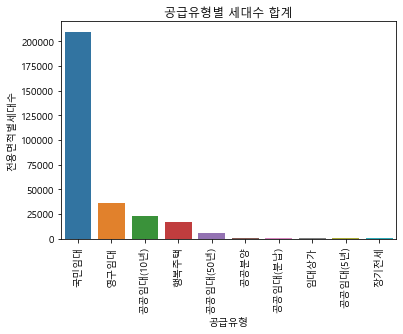

In [47]:
sns.barplot(data=train.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=train.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.xticks(rotation=90)
plt.title('공급유형별 세대수 합계')
plt.show()

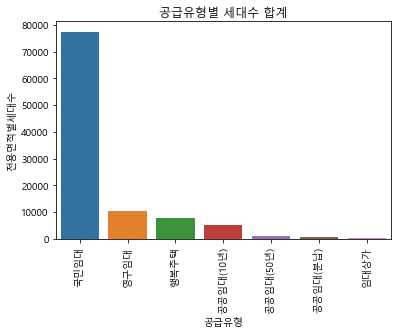

In [48]:
sns.barplot(data=test.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=test.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.xticks(rotation=90)
plt.title('공급유형별 세대수 합계')
plt.show()

# 국민임대가 가장 높은 비율을 차지함

#### 전용면적

In [49]:
train.loc[train['단지코드'] == 'C2612'][['단지코드', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']]

# 전용면적이 동일한 데이터가 있어서 보니 타입(구조)이 다름
# 즉, 전용면적이 같더라도 타입이 다르고 전용면적별세대수가 별도로 존재
# 동일한 전용면적을 보통 알파벳으로 구분 
# 필요하면 29A, 29B처럼 바꿔줘야할거 같음

,단지코드,전용면적,전용면적별세대수,자격유형,임대보증금,임대료
2463,C2612,29.71,628,A,9800000,154000
2464,C2612,29.71,54,A,9800000,154000
2465,C2612,36.61,620,A,12800000,197000
2466,C2612,46.41,382,A,27500000,257000


#### 자격유형

In [50]:
train['자격유형'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [51]:
train.groupby(['단지코드', '전용면적', '전용면적별세대수'])['자격유형'].nunique().value_counts()
# 타입당 전부 1개의 신분을 가짐
# 해당 타입을 임차할 수 있는 자격이 정해짐

1    2548
Name: 자격유형, dtype: int64

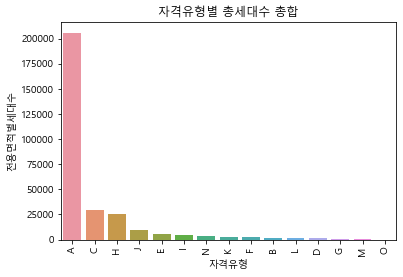

In [52]:
sns.barplot(data=train.groupby(['자격유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=train.groupby(['자격유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.title('자격유형별 총세대수 총합')
plt.xticks(rotation=90)
plt.show()
#자격유형별 세대수를 모두 더해주면 A가 압도적으로 많음

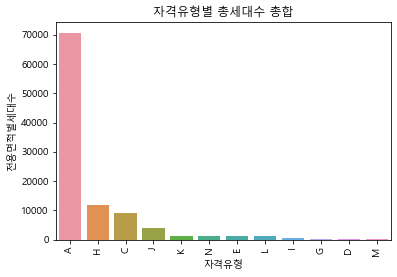

In [53]:
sns.barplot(data=test.groupby(['자격유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=test.groupby(['자격유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.title('자격유형별 총세대수 총합')
plt.xticks(rotation=90)
plt.show()

# test도 비슷하지만 B, F, O가 없음

In [54]:
train.loc[train['임대건물구분'] == '아파트']['자격유형'].value_counts()

A    1729
H     155
J     103
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
D       7
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [55]:
train.loc[train['임대건물구분'] == '상가']['자격유형'].value_counts()

# D형은 상가유형에만 있음 나머지 유형은 모두 아파트 
# 그런데 C1350은 아파트이면서 자격유형이 D인 단지가 있음
# 동일 단지에 다른 유형으로 채워줘야할거 같음

D    562
Name: 자격유형, dtype: int64

--------------여기까지 참고하면 좋을듯--------------

#### 지하철

In [56]:
train_danji['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts()

0.0    348
1.0     38
2.0      5
3.0      1
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

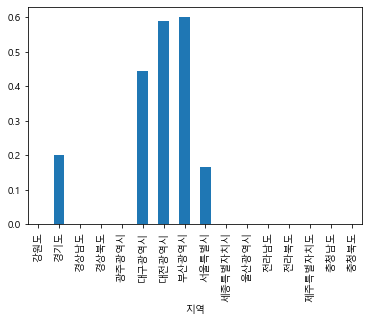

In [57]:
train_danji.groupby(['지역'])['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean().plot(kind='bar')

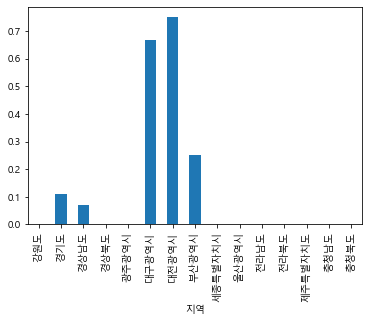

In [58]:
test_danji.groupby(['지역'])['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean().plot(kind='bar')

#test는 경남에 지하철이 있음

#### 버스

In [59]:
train_danji['도보 10분거리 내 버스정류장 수'].value_counts()

2.0     111
3.0      98
4.0      63
1.0      45
5.0      26
6.0      24
8.0      13
7.0      10
10.0      8
12.0      4
20.0      3
15.0      1
14.0      1
0.0       1
11.0      1
16.0      1
19.0      1
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

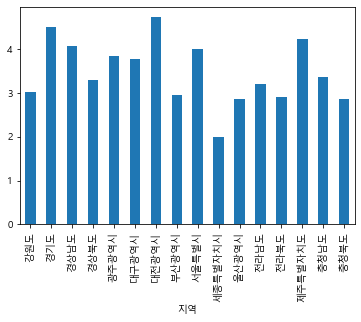

In [60]:
train_danji.groupby(['지역'])['도보 10분거리 내 버스정류장 수'].mean().plot(kind='bar')

In [61]:
train_danji['도보 10분거리 내 버스정류장 수'].value_counts()

2.0     111
3.0      98
4.0      63
1.0      45
5.0      26
6.0      24
8.0      13
7.0      10
10.0      8
12.0      4
20.0      3
15.0      1
14.0      1
0.0       1
11.0      1
16.0      1
19.0      1
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

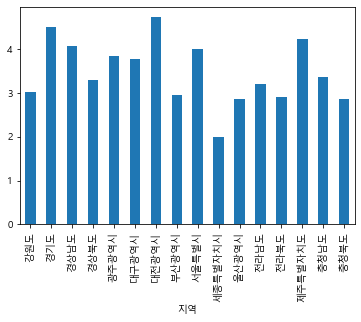

In [62]:
train_danji.groupby(['지역'])['도보 10분거리 내 버스정류장 수'].mean().plot(kind='bar')

#### 단지내 주차면수

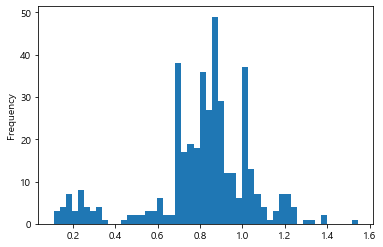

In [63]:
(train_danji['단지내주차면수'] / train_danji['총세대수']).plot(kind='hist', bins=50)

#단지내주차면수/총세대수를 보면 대체로 1을 평균으로 정규분포를 띄고 있음
#하지만 0에 가까운 단지들이 꽤 있고 4가 넘는 outlier도 존재함

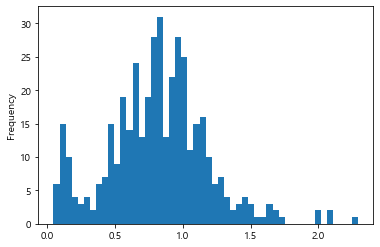

In [64]:
(train_danji['등록차량수'] / train_danji['총세대수']).plot(kind='hist', bins=50)

# 등록차량수 분포도 비슷하게 형성되는 것을 보아 매우 근사함
# 기존 주차면수 측정 방식이 나쁘지 않음

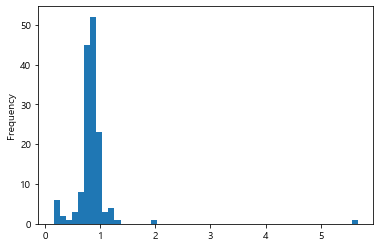

In [65]:
(test_danji['단지내주차면수'] / test_danji['총세대수']).plot(kind='hist', bins=50)

#test도 비슷한 분포를 보임

### 2) age

In [66]:
area = age.set_index('지역')

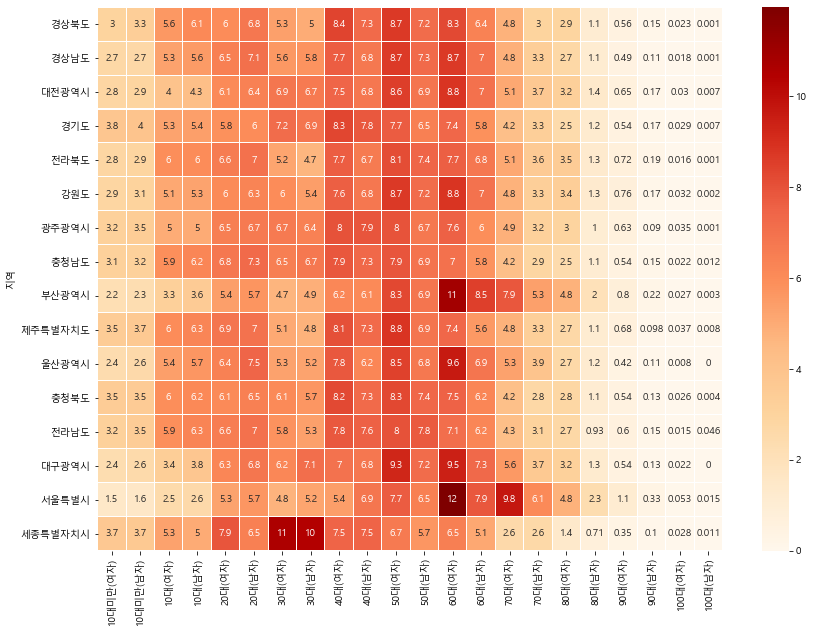

In [67]:
# age 히트맵
# 색 참고 : https://chrisalbon.com/code/python/data_visualization/seaborn_color_palettes/

plt.figure(figsize=(14, 10))
sns.heatmap((area*100).round(3),
           annot=True, linewidths=0.01,
           cbar=True, cmap="OrRd")

plt.show() 

# 같은 나이대여도 성별마다 편차가 존재 , 대체로 여성이 더 높은 비율을 보임
# 서울특별시는 60대 여성, 70대 여성에서 피크 / 부산광역시는 서울과 비슷한 패턴을 보임
# => 인구가 많은 특별시, 광역시 (서울, 부산, 울산, 대구 등 )에서 60~70대의 비중이 매우 높음
# 세종특별자치시는 다른 시도와 다르게 30대에서 매우 높은 비중을 보임
# 세종을 제외한 광역시와 도단위 지역구의 평균을 비교했을 때 10대와 40대, 60~70대의 차이가 두드러짐

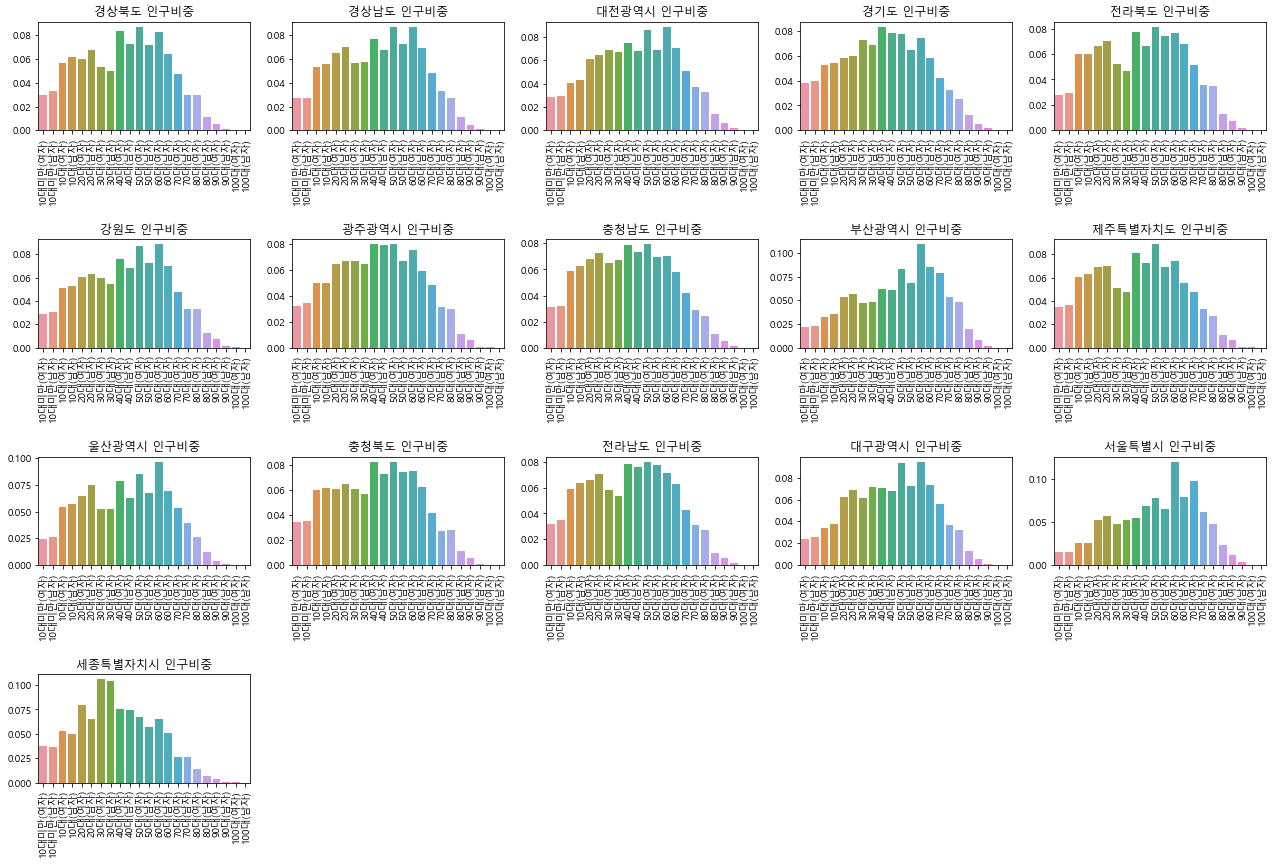

In [68]:
fig = plt.figure(figsize=(22, 18))
plt.xticks(rotation=90)
for i, n in enumerate(list(area.index)):
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=1.0)
    plt.title("{} 인구비중".format(n))
    sns.barplot(data=area.loc[area.index == n])
    plt.xticks(rotation=90)
    
#앞서 살펴본 결과를 따로 확인, 세종을 제외하고 크게 두 패턴으로 나뉨

### < 결측치 처리 >

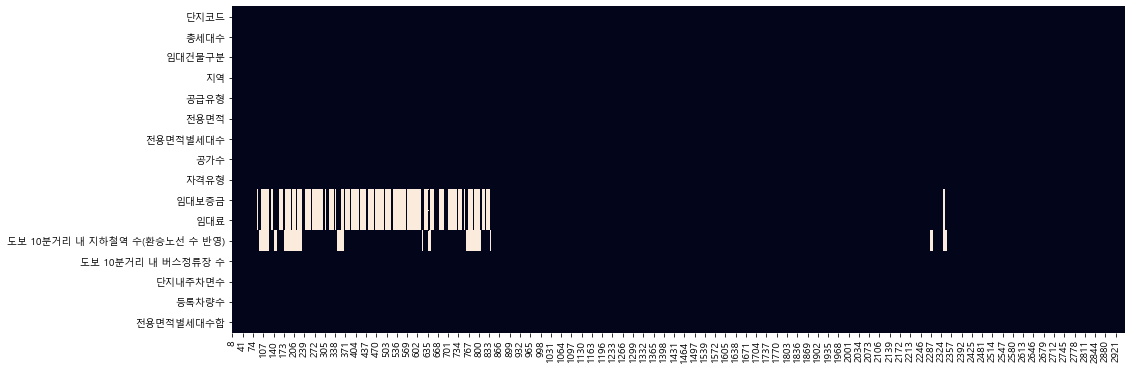

In [69]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.isnull().T, cbar=False)
plt.show()

In [70]:
train.isnull().sum().to_frame()

# 임대보증금, 임대료, 지하철역에 결측치 존재 (버스정류장은 오류 제거하면서 없어짐)
# 임대보증금과 임대료의 결측치행은 동일해보임

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,569


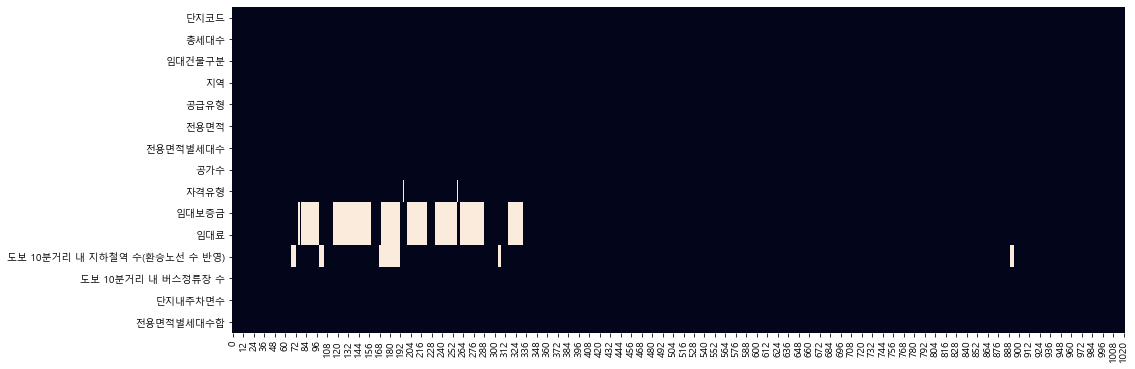

In [71]:
plt.figure(figsize=(16, 6))
sns.heatmap(test.isnull().T, cbar=False)
plt.show()

In [72]:
test.isnull().sum().to_frame()

#버스 정류장의 결측치는 없지만 자격유형에서 결측치가 발생

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,2
임대보증금,180


### 1) 지하철역

In [73]:
train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].sample(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합
365,C1983,903,상가,충청남도,임대상가,31.84,1,3.0,D,NaN,NaN,NaN,4.0,200.0,253.0,8
350,C1068,806,아파트,충청남도,국민임대,46.86,44,11.0,A,18726000,149810,NaN,2.0,804.0,510.0,44
2294,C2583,1106,아파트,대전광역시,영구임대,26.90,72,21.0,I,8707000,84230,NaN,2.0,752.0,982.0,180
199,C1704,639,아파트,대전광역시,영구임대,39.69,420,34.0,C,8710000,120370,NaN,7.0,162.0,131.0,420
360,C1983,903,상가,충청남도,임대상가,31.84,1,3.0,D,NaN,NaN,NaN,4.0,200.0,253.0,8


In [74]:
print('전체 단지 수: ', train['단지코드'].nunique())
print('지하철 결측치 단지 수: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].unique())

# 지하철역 결측값은 총 19개의 단지에서 발생함 또한 충남, 대전에서만 발생
# 해당 지역에 지하철이 없더라도 0값으로 채워진 단지가 있으므로 단순 결측치로 보임
# 충남 북부나 대전은 대전지하철이 있으므로 평균으로 결측치 대체

전체 단지 수:  411
지하철 결측치 단지 수:  19
지하철 결측치 단지:  ['C1312' 'C1874' 'C1424' 'C2100' 'C2520' 'C1616' 'C1704' 'C2258' 'C1068'
 'C1983' 'C2216' 'C2644' 'C1005' 'C1004' 'C1875' 'C2156' 'C1175' 'C2583'
 'C1350']
지하철 결측치 단지 지역:  ['충청남도' '대전광역시']


In [75]:
test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].sample(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수합
186,C2177,1245,상가,충청남도,임대상가,33.31,1,2.0,D,NaN,NaN,NaN,1.0,187.0,1
172,C2177,1245,상가,충청남도,임대상가,15.00,1,2.0,D,NaN,NaN,NaN,1.0,187.0,2
102,C1083,427,아파트,대전광역시,국민임대,51.99,107,0.0,A,32459000,187260,NaN,6.0,384.0,203
184,C2177,1245,상가,충청남도,임대상가,28.50,1,2.0,D,NaN,NaN,NaN,1.0,187.0,1
185,C2177,1245,상가,충청남도,임대상가,33.15,1,2.0,D,NaN,NaN,NaN,1.0,187.0,1


In [76]:
# C1312 / C1874 / C2100 / C1616 등등 단지 코드에 해당하는 지하철 수 모두 결측
# 반올림해서 0,1로 대체

In [77]:
print('전체 단지 수: ', test['단지코드'].nunique())
print('지하철 결측치 단지 수: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].unique())

#test는 5단지에 지하철 정보가 없고 충남과 대전에서 발생함

전체 단지 수:  150
지하철 결측치 단지 수:  5
지하철 결측치 단지:  ['C1472' 'C1083' 'C2177' 'C1318' 'C1327']
지하철 결측치 단지 지역:  ['충청남도' '대전광역시']


In [78]:
x=train[train["지역"]=="충청남도"]
x1=x['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean()
print(x1)

0.0


In [79]:
x=train[train["지역"]=="대전광역시"]
x2=x['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean()
print(x2)

0.7225433526011561


In [80]:
x=test[test["지역"]=="충청남도"]
x3=x['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean()
print(x3)

0.0


In [81]:
x=test[test["지역"]=="대전광역시"]
x4=x['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean()
print(x4)

1.2765957446808511


In [82]:
train.loc[train['지역'] == '충청남도', '도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
train.loc[train['지역'] == '대전광역시', '도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(1)

In [83]:
test.loc[test['지역'] == '충청남도', '도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
test.loc[test['지역'] == '대전광역시', '도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(1)

### 2) 임대보증금, 임대료

-----특성파악----

In [84]:
train.loc[(train['임대건물구분'] != '상가') & (train['임대보증금'].isnull())]
# 자격유형이 D형인 아파트에만 결측이 있음
# D형은 상가에만 있는 유형이므로 잘못 입력된 것은 아닌지 의심해야함

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,476
2332,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,476
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,476
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,183
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,183
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,26
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,26


In [85]:
test.loc[(test['임대건물구분'] != '상가') & (test['임대보증금'].isnull())]

#train, test에서 임대보증금과 임대료가 결측치인 단지가 1개씩 존재

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수합
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,1181
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,1181
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0,6


In [86]:
train.loc[train['단지코드'] == 'C1004'].head()
#아파트 단지에 상가가 있는 경우가 있음

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합
764,C1004,521,아파트,충청남도,영구임대,39.30,240,3.0,C,4682000,104180,0.0,2.0,153.0,93.0,240
765,C1004,521,아파트,충청남도,영구임대,39.69,264,3.0,C,4728000,105210,0.0,2.0,153.0,93.0,264
766,C1004,521,상가,충청남도,임대상가,19.00,1,3.0,D,NaN,NaN,0.0,2.0,153.0,93.0,1
767,C1004,521,상가,충청남도,임대상가,14.10,1,3.0,D,NaN,NaN,0.0,2.0,153.0,93.0,1
768,C1004,521,상가,충청남도,임대상가,19.31,1,3.0,D,NaN,NaN,0.0,2.0,153.0,93.0,1


In [87]:
len(train.loc[train['임대건물구분'] == '상가'])

562

In [88]:
train.loc[train['임대건물구분'] == '상가'].isnull().sum().to_frame()

#상가는 임대보증금, 임대료가 전부 결측치

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,562


In [89]:
print('전체 단지 수: ', train['단지코드'].nunique())
print('상가 보유 단지 수: ', train.loc[train['임대건물구분'] == '상가']['단지코드'].nunique())
print('상가 보유 단지: ', train.loc[train['임대건물구분'] == '상가']['단지코드'].unique())
print('상가 보유 단지 지역: ', train.loc[train['임대건물구분'] == '상가']['지역'].unique())

#총 32개 단지에서 상가를 보유하고 있고 지역도 다양함

전체 단지 수:  411
상가 보유 단지 수:  33
상가 보유 단지:  ['C1925' 'C1874' 'C2416' 'C2621' 'C1616' 'C1704' 'C2258' 'C2038' 'C1859'
 'C1722' 'C2190' 'C1476' 'C1983' 'C2135' 'C2034' 'C1109' 'C2289' 'C2597'
 'C2310' 'C2132' 'C1439' 'C1899' 'C1056' 'C2644' 'C1206' 'C1775' 'C1790'
 'C2109' 'C1698' 'C1004' 'C1875' 'C2212' 'C2571']
상가 보유 단지 지역:  ['강원도' '충청남도' '경상남도' '대전광역시' '부산광역시' '제주특별자치도']


In [90]:
len(test.loc[test['임대건물구분'] == '상가'])

177

In [91]:
test.loc[test['임대건물구분'] == '상가'].isnull().sum().to_frame()

#train과 마찬가지로 상가건물은 임대보증금과 임대료가 결측치

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,177


In [92]:
print('전체 단지 수: ', test['단지코드'].nunique())
print('상가 보유 단지 수: ', test.loc[test['임대건물구분'] == '상가']['단지코드'].nunique())
print('상가 보유 단지: ', test.loc[test['임대건물구분'] == '상가']['단지코드'].unique())
print('상가 보유 단지 지역: ', test.loc[test['임대건물구분'] == '상가']['지역'].unique())

#총 7개 단지에 상가가 있음

전체 단지 수:  150
상가 보유 단지 수:  7
상가 보유 단지:  ['C1006' 'C2676' 'C2177' 'C2033' 'C1812' 'C2253' 'C1729']
상가 보유 단지 지역:  ['대전광역시' '부산광역시' '충청남도' '울산광역시' '강원도']


In [93]:
# 공급유형으로 인해 임대보증금과 임대료가 NA

train.loc[train['공급유형'] == '공공분양']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,476
2332,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,476
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,476
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,183
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,183
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,26
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,1.0,6.0,1636.0,2315.0,26


In [94]:
test.loc[test['공급유형'] == '공공분양']

#공급유형에서 공공분양은 train에 하나밖에 없고 임대가 아니라 분양이기 때문에
#임대보증금과 임대료가 NA

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수합


In [95]:
train.loc[train['공급유형'] == '장기전세']

# 장기전세는 전세이므로 임대료가 없음

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000,-,0.0,3.0,673.0,645.0,126
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000,-,0.0,3.0,673.0,645.0,49
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000,-,0.0,3.0,673.0,645.0,75


-----특성파악----

In [96]:
train["임대료"]=train["임대료"].replace("-",np.NaN)
train["임대보증금"]=train["임대보증금"].replace("-",np.NaN)

In [97]:
test["임대료"]=test["임대료"].replace("-",np.NaN)
test["임대보증금"]=test["임대보증금"].replace("-",np.NaN)

In [98]:
print(train.dtypes)

단지코드                             object
총세대수                              int64
임대건물구분                           object
지역                               object
공급유형                             object
전용면적                            float64
전용면적별세대수                          int64
공가수                             float64
자격유형                             object
임대보증금                            object
임대료                              object
도보 10분거리 내 지하철역 수(환승노선 수 반영)    float64
도보 10분거리 내 버스정류장 수              float64
단지내주차면수                         float64
등록차량수                           float64
전용면적별세대수합                         int64
dtype: object


In [99]:
train["임대료"]=train["임대료"].astype("float")
train["임대보증금"]=train["임대보증금"].astype("float")
print(train.dtypes)

단지코드                             object
총세대수                              int64
임대건물구분                           object
지역                               object
공급유형                             object
전용면적                            float64
전용면적별세대수                          int64
공가수                             float64
자격유형                             object
임대보증금                           float64
임대료                             float64
도보 10분거리 내 지하철역 수(환승노선 수 반영)    float64
도보 10분거리 내 버스정류장 수              float64
단지내주차면수                         float64
등록차량수                           float64
전용면적별세대수합                         int64
dtype: object


In [100]:
#장기전세 임대료 0으로

train.loc[train['공급유형'] == '장기전세', '임대료'] = train['임대료'].fillna(0)

In [101]:
train.loc[train['지역'] == '부산광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
train.loc[train['지역'] == '대전광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
train.loc[train['지역'] == '경상남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())
train.loc[train['지역'] == '충청남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
train.loc[train['지역'] == '강원도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '제주특별자치도']['임대료'].mean())
train.loc[train['지역'] == '대구광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '대구광역시']['임대료'].mean())


train.loc[train['지역'] == '부산광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
train.loc[train['지역'] == '대전광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
train.loc[train['지역'] == '경상남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())
train.loc[train['지역'] == '충청남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
train.loc[train['지역'] == '강원도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '제주특별자치도']['임대보증금'].mean())
train.loc[train['지역'] == '대구광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '대구광역시']['임대보증금'].mean())

In [102]:
test.loc[test['지역'] == '부산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
test.loc[test['지역'] == '대전광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
test.loc[test['지역'] == '울산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '울산광역시']['임대료'].mean())
test.loc[test['지역'] == '충청남도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
test.loc[test['지역'] == '강원도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())  
test.loc[test['지역'] == '경상남도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())  


test.loc[test['지역'] == '부산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '대전광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
test.loc[test['지역'] == '울산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '울산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '충청남도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
test.loc[test['지역'] == '강원도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
test.loc[test['지역'] == '경상남도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())

### 3) 자격유형

In [103]:
test.loc[test['자격유형'].isnull()]

#test 2개 단지에서 자격유형에 대한 결측치가 보임

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수합
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,240
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,745


In [104]:
test[test.단지코드=='C2411'] 
#같은 단지의 자격유형이 모두 A이므로 누락된 것으로 생각

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수합
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0,56
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0,336
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0,179
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,240
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0,150


In [105]:
test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'

In [106]:
test[test.단지코드=='C2253'] 
#같은 단지의 임대상가가 아닌 영구임대 유형의 경우 모두 C이므로 C로 대체

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수합
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,745
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0,388
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0,388
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,1.80055e+07,183339,0.0,2.0,173.0,1
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,1.80055e+07,183339,0.0,2.0,173.0,1
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,1.80055e+07,183339,0.0,2.0,173.0,1
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,1.80055e+07,183339,0.0,2.0,173.0,2
265,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,1.80055e+07,183339,0.0,2.0,173.0,2
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,1.80055e+07,183339,0.0,2.0,173.0,2
267,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,1.80055e+07,183339,0.0,2.0,173.0,2


In [107]:
test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'

In [108]:
#결측치 모두 제거됐는지 확인 

train.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,0


In [109]:
test.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,0


### <새로운 변수 생성>

age 파생변수

In [110]:
train2=train
test2=test #중간 저장

In [111]:
인구수 = pd.read_csv("C:/Users/LG/Desktop/행정구역_시군구_별_1세별_주민등록인구_20210929200208.csv", encoding="cp949")
인구수.head()

,지역,인구수
0,서울특별시,9550227
1,부산광역시,3359527
2,대구광역시,2393626
3,인천광역시,2938429
4,광주광역시,1441970


In [112]:
# 차량보유인구비율 : 30대~50대의 차량보유비율
# https://www.carisyou.com/magazine/STATS/76678

cars = pd.DataFrame(age.iloc[:, [7, 8, 9, 10, 11, 12]].sum(axis=1), columns=['차량보유인구비율'])
cars['지역'] = age['지역']
train = pd.merge(train, cars, how='left', on='지역')
test = pd.merge(test, cars, how='left', on='지역')
print(f'Train Set: {train.shape} | Test Set: {test.shape}')

Train Set: (2869, 17) | Test Set: (1022, 16)


In [113]:
# 미성년자 : 미성년자와 등록차량수가 관련이 있을거라 가정
# (미성년자 변수와 age 데이터를 모두 붙이는 코드임)

minors = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)']
age['미성년자비율'] = age[minors].sum(axis=1)

age2=age[["지역","미성년자비율"]]

train = train.merge(age2, left_on= ["지역"], right_on= ["지역"], how='left')
test = test.merge(age2, left_on= ["지역"], right_on= ["지역"], how='left')

In [114]:
# 고령자 : 70대 이상을 기준으로 생성
more = ['70대(여자)', '70대(남자)','80대(여자)', '80대(남자)','90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)']
age['고령자비율'] = age[more].sum(axis=1)

age2=age[["지역","고령자비율"]]

train = train.merge(age2, left_on= ["지역"], right_on= ["지역"], how='left')
test = test.merge(age2, left_on= ["지역"], right_on= ["지역"], how='left')

In [115]:
train = pd.merge(train, 인구수, how='left', on='지역')
test = pd.merge(test, 인구수, how='left', on='지역')

In [116]:
train["차량보유인구"] = train["차량보유인구비율"]*train["인구수"]
train["미성년자"] = train["미성년자비율"]*train["인구수"]
train["고령자"] = train["고령자비율"]*train["인구수"]

test["차량보유인구"] = test["차량보유인구비율"]*test["인구수"]
test["미성년자"] = test["미성년자비율"]*test["인구수"]
test["고령자"] = test["고령자비율"]*test["인구수"]

In [117]:
train.drop(["차량보유인구비율","미성년자비율","고령자비율"],axis=1,inplace=True)
test.drop(["차량보유인구비율","미성년자비율","고령자비율"],axis=1,inplace=True)

In [118]:
pd.set_option('display.max_columns', None) ## 모든 열 출력

train.tail()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합,인구수,차량보유인구,미성년자,고령자
2864,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0,19,1536270,641836.065555,251284.267248,209970.207729
2865,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,34,1536270,641836.065555,251284.267248,209970.207729
2866,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,34,1536270,641836.065555,251284.267248,209970.207729
2867,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,114,1536270,641836.065555,251284.267248,209970.207729
2868,C2532,239,아파트,강원도,국민임대,54.95,19,7.0,A,14830000.0,151030.0,0.0,1.0,166.0,146.0,19,1536270,641836.065555,251284.267248,209970.207729


In [119]:
test.tail()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수합,인구수,차량보유인구,미성년자,고령자
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,2.14684e+07,159783,0.0,1.0,467.0,126,3322373,1.389076e+06,541970.368466,420194.146952
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0,116,1792476,7.135172e+05,317124.008067,257678.023542
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0,116,1792476,7.135172e+05,317124.008067,257678.023542
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0,202,1792476,7.135172e+05,317124.008067,257678.023542
1021,C2189,382,아파트,전라북도,국민임대,46.23,60,45.0,H,18689000,166500,0.0,2.0,300.0,60,1792476,7.135172e+05,317124.008067,257678.023542


#### 여러 파생변수

#### 지하철 존재 유무 : 지하철역이 1이상인 경우 존재한다고 보고 더미변수를 생성

In [120]:
train = train.astype({'임대보증금': 'int'})
train = train.astype({'임대료': 'int'})
train = train.astype({'공가수': 'int'})
train = train.astype({'도보 10분거리 내 지하철역 수(환승노선 수 반영)': 'int'})
train = train.astype({'도보 10분거리 내 버스정류장 수': 'int'})
train = train.astype({'단지내주차면수': 'int'})
train = train.astype({'등록차량수': 'int'})

test = test.astype({'임대보증금': 'int'})
test = test.astype({'임대료': 'int'})
test = test.astype({'공가수': 'int'})
test = test.astype({'도보 10분거리 내 지하철역 수(환승노선 수 반영)': 'int'})
test = test.astype({'도보 10분거리 내 버스정류장 수': 'int'})
test = test.astype({'단지내주차면수': 'int'})

In [121]:
train["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].unique()

array([0, 1, 2, 3])

In [122]:
test["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].unique()

array([0, 2, 1])

In [123]:
# 지하철 존재 유무 : 지하철역이 1이상인 경우 존재한다고 보고 더미변수를 생성

#train 0,1,2,3
#train 0,1,2

train["도보 10분거리 내 지하철역 수(환승노선 수 반영)"]=train["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].replace(2,1)
train["도보 10분거리 내 지하철역 수(환승노선 수 반영)"]=train["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].replace(3,1)
test["도보 10분거리 내 지하철역 수(환승노선 수 반영)"]=test["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].replace(2,1)

In [124]:
train.rename(columns={"도보 10분거리 내 지하철역 수(환승노선 수 반영)":"지하철유무"},inplace=True)
test.rename(columns={"도보 10분거리 내 지하철역 수(환승노선 수 반영)":"지하철유무"},inplace=True)

#### 건물가치 : 단지 내 임대 보증금의 전체 합

In [125]:
total_fee = train['임대보증금'] * train['전용면적별세대수']
train['건물가치'] = total_fee

total_fee = test['임대보증금'] * test['전용면적별세대수']
test['건물가치'] = total_fee

### < 이상치 처리 >

In [126]:
train.loc[train[['단지코드']].drop_duplicates().index][['단지코드', '총세대수']].nlargest(3, '총세대수')

,단지코드,총세대수
2439,C1363,2568
514,C2132,2428
253,C1859,2424


In [127]:
train.loc[train[['단지코드']].drop_duplicates().index][['단지코드', '총세대수']].nsmallest(3, '총세대수')

#2568세대부터 26세대까지 있음

,단지코드,총세대수
2749,C2059,26
2859,C2020,40
2165,C2237,70


In [128]:
train.loc[train[['단지코드']].drop_duplicates().index][['단지코드', '등록차량수']].nlargest(3, '등록차량수')

,단지코드,등록차량수
2439,C1363,2550
2284,C1350,2315
2547,C1802,1983


In [129]:
train.loc[train[['단지코드']].drop_duplicates().index][['단지코드', '등록차량수']].nsmallest(3, '등록차량수')

#2550대가 등록된 단지부터 13대만 등록되어있는 단지가 있음

,단지코드,등록차량수
2749,C2059,13
2862,C2437,16
814,C2401,19


### 버스 정류장

In [130]:
train['도보 10분거리 내 버스정류장 수'].unique()

array([ 3,  1,  2,  6, 10,  5,  4,  7, 12, 14,  8,  0, 20, 11, 16, 15, 19])

In [131]:
test['도보 10분거리 내 버스정류장 수'].unique()

#test에 뜬금없이 50인 값이 존재

array([ 2,  3, 16,  6,  1,  4,  5,  8, 10, 13,  7, 11, 50, 12, 14, 18, 15,
       19, 17])

In [132]:
test[test['도보 10분거리 내 버스정류장 수']==50] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철유무,도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수합,인구수,차량보유인구,미성년자,고령자,건물가치
383,C1852,898,아파트,경기도,국민임대,39.59,219,6,H,23720000,197230,0,50,785,219,13530519,6.018395e+06,2.490595e+06,1.624917e+06,5194680000
384,C1852,898,아파트,경기도,국민임대,39.72,56,6,A,23720000,197230,0,50,785,100,13530519,6.018395e+06,2.490595e+06,1.624917e+06,1328320000
385,C1852,898,아파트,경기도,국민임대,39.72,44,6,A,23720000,197230,0,50,785,100,13530519,6.018395e+06,2.490595e+06,1.624917e+06,1043680000
386,C1852,898,아파트,경기도,국민임대,46.90,46,6,A,37454000,259660,0,50,785,293,13530519,6.018395e+06,2.490595e+06,1.624917e+06,1722884000
387,C1852,898,아파트,경기도,국민임대,46.90,22,6,A,37454000,259660,0,50,785,293,13530519,6.018395e+06,2.490595e+06,1.624917e+06,823988000
388,C1852,898,아파트,경기도,국민임대,46.90,225,6,H,37454000,259660,0,50,785,293,13530519,6.018395e+06,2.490595e+06,1.624917e+06,8427150000
389,C1852,898,아파트,경기도,국민임대,51.93,136,6,H,45193000,308350,0,50,785,180,13530519,6.018395e+06,2.490595e+06,1.624917e+06,6146248000
390,C1852,898,아파트,경기도,국민임대,51.93,44,6,H,45193000,308350,0,50,785,180,13530519,6.018395e+06,2.490595e+06,1.624917e+06,1988492000
391,C1852,898,아파트,경기도,국민임대,59.61,106,6,H,61674000,370790,0,50,785,106,13530519,6.018395e+06,2.490595e+06,1.624917e+06,6537444000


In [133]:
test.loc[test['도보 10분거리 내 버스정류장 수'] == 50, '도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].mean()

# 50정도면 지역 내 큰 값으로 대신해도 된다고 판단, train 최대값으로 대체
# train[train['지역'] == '경기도']['도보 10분거리 내 버스정류장 수'].max() 

#### 모델링 전 데이터 저장

In [134]:
train.to_csv('C:/Users/LG/Desktop/train_final.csv', index=False, encoding='euc-kr')
test.to_csv('C:/Users/LG/Desktop/test_final.csv', index=False, encoding='euc-kr')

### < 모델링 >

### CatBoost

In [41]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train = pd.read_csv("C:/Users/LG/Desktop/train_final.csv",encoding="cp949")
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철유무,도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합,인구수,차량보유인구,미성년자,고령자,건물가치
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17,A,9216000,82940,0,3,624,205,276,3322373,1.389076e+06,541970.368466,420194.146952,2543616000
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17,A,12672000,107130,0,3,624,205,80,3322373,1.389076e+06,541970.368466,420194.146952,760320000
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17,A,12672000,107130,0,3,624,205,80,3322373,1.389076e+06,541970.368466,420194.146952,253440000
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17,A,18433000,149760,0,3,624,205,57,3322373,1.389076e+06,541970.368466,420194.146952,700454000
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17,A,18433000,149760,0,3,624,205,57,3322373,1.389076e+06,541970.368466,420194.146952,350227000


In [43]:
test = pd.read_csv("C:/Users/LG/Desktop/test_final.csv",encoding="cp949")
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철유무,도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수합,인구수,차량보유인구,미성년자,고령자,건물가치
0,C1072,754,아파트,경기도,국민임대,39.79,116,14,H,22830000,189840,0,2.0,683,116,13530519,6.018395e+06,2.490595e+06,1.624917e+06,2648280000
1,C1072,754,아파트,경기도,국민임대,46.81,30,14,A,36048000,249930,0,2.0,683,30,13530519,6.018395e+06,2.490595e+06,1.624917e+06,1081440000
2,C1072,754,아파트,경기도,국민임대,46.90,112,14,H,36048000,249930,0,2.0,683,232,13530519,6.018395e+06,2.490595e+06,1.624917e+06,4037376000
3,C1072,754,아파트,경기도,국민임대,46.90,120,14,H,36048000,249930,0,2.0,683,232,13530519,6.018395e+06,2.490595e+06,1.624917e+06,4325760000
4,C1072,754,아파트,경기도,국민임대,51.46,60,14,H,43497000,296780,0,2.0,683,60,13530519,6.018395e+06,2.490595e+06,1.624917e+06,2609820000


변수 추가

In [44]:
# 면적당보증금, 면적당임대료 생성
train['면적당보증금']=train['임대보증금']/train['전용면적']
train['면적당임대료']=train['임대료']/train['전용면적']

test['면적당보증금']=test['임대보증금']/test['전용면적']
test['면적당임대료']=test['임대료']/test['전용면적']

In [45]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철유무', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '전용면적별세대수합', '인구수', '차량보유인구', '미성년자', '고령자', '건물가치', '면적당보증금',
       '면적당임대료'],
      dtype='object')

In [46]:
#지역변수를 숫자형으로 표기
local_map = {}
for i, loc in enumerate(train['지역'].unique()):
    local_map[loc] = i

train['지역num'] = train['지역'].map(local_map)
test['지역num'] = test['지역'].map(local_map)

In [47]:
# 지역 더미화 
gy1=pd.get_dummies(train['지역'])
gy2=pd.get_dummies(test['지역'])

train=pd.concat([train,gy1],axis=1)
test=pd.concat([test,gy2],axis=1)

test['서울특별시']=0

In [48]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철유무', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '전용면적별세대수합', '인구수', '차량보유인구', '미성년자', '고령자', '건물가치', '면적당보증금',
       '면적당임대료', '지역num', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'],
      dtype='object')

In [49]:
# 모델링에 사용할 변수들
#전용면적별 세대수합 제거 
columns = ['단지코드', '총세대수', '공가수','강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도',
       '전라북도', '제주특별자치도', '충청남도', '충청북도' , '단지내주차면수', '지하철유무', '도보 10분거리 내 버스정류장 수', 
           '차량보유인구', '미성년자', '고령자', '건물가치']
target = '등록차량수'


In [50]:
# train과 test를 단지코드별로 묶어 새로운 데이터프레임으로 만든다.
new_train = pd.DataFrame()
new_test = pd.DataFrame()

for i, code in tqdm(enumerate(train['단지코드'].unique())):
    temp = train[train['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_train.loc[i, col] = temp.loc[0, col]

    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']

411it [00:06, 58.81it/s]


In [51]:
for i, code in tqdm(enumerate(test['단지코드'].unique())):
    temp = test[test['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_test.loc[i, col] = temp.loc[0, col]

150it [00:02, 65.02it/s]


In [52]:
# 단지코드별 다른 값을 가지는 변수들은 평균값으로 병합시켜준다.
temp=train.groupby(['단지코드'])[['전용면적', '전용면적별세대수', '면적당보증금', '면적당임대료']].mean().reset_index().rename(columns={'전용면적':'전용면적평균', '전용면적별세대수':'전용면적별세대수평균', '면적당보증금':'면적당보증금평균', '면적당임대료':'면적당임대료평균'})

h = [1 if train.groupby(['단지코드']).nunique().iloc[i,2] == 2 else 0 for i in range(train['단지코드'].nunique())] #주상복합
temp = pd.concat([temp, pd.DataFrame(h)], axis=1).rename(columns={0:'주상복합'})
new_train = pd.merge(new_train, temp, how='left', on='단지코드')

In [53]:
temp

,단지코드,전용면적평균,전용면적별세대수평균,면적당보증금평균,면적당임대료평균,주상복합
0,C1000,45.218571,80.857143,290441.338901,2653.911427,0
1,C1004,39.136842,27.421053,678864.538057,4481.778026,1
2,C1005,54.360000,381.333333,314710.055884,4082.026460,0
3,C1013,46.142000,261.600000,538872.570220,2912.360394,0
4,C1014,49.232857,142.285714,473984.047603,3307.937931,0
...,...,...,...,...,...,...
406,C2663,41.005000,128.666667,706899.191558,6540.658287,0
407,C2666,43.258333,180.666667,435432.733740,3064.166768,0
408,C2670,40.918000,129.600000,391268.839388,2810.026512,0
409,C2680,43.350000,252.666667,545113.847426,2972.892493,0


In [54]:
pd.set_option('display.max_columns', None) 

new_train.head()

,단지코드,총세대수,공가수,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,단지내주차면수,지하철유무,도보 10분거리 내 버스정류장 수,차량보유인구,미성년자,고령자,건물가치,등록차량수,전용면적평균,전용면적별세대수평균,면적당보증금평균,면적당임대료평균,주상복합
0,C2515,545.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,624.0,0.0,3.0,1.389076e+06,5.419704e+05,4.201941e+05,2.543616e+09,205.0,44.345714,77.857143,369723.800809,3084.233449,0
1,C1407,1216.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285.0,1.0,1.0,6.293865e+05,2.044855e+05,2.079559e+05,4.498560e+09,1064.0,41.253636,110.545455,670795.282442,4243.676268,0
2,C1945,755.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,734.0,1.0,3.0,6.018395e+06,2.490595e+06,1.624917e+06,1.872840e+09,730.0,50.510000,125.833333,442099.439591,3690.264516,0
3,C1470,696.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,645.0,0.0,2.0,7.135172e+05,3.171240e+05,2.576780e+05,2.739420e+09,553.0,42.982500,174.000000,401127.756990,2795.712287,0
4,C1898,566.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,517.0,0.0,6.0,7.135172e+05,3.171240e+05,2.576780e+05,2.763450e+09,415.0,42.575000,94.333333,398960.302187,2798.278793,0


In [55]:
temp=test.groupby(['단지코드'])[['전용면적', '전용면적별세대수', '면적당보증금', '면적당임대료']].mean().reset_index().rename(columns={'전용면적':'전용면적평균', '전용면적별세대수':'전용면적별세대수평균', '면적당보증금':'면적당보증금평균', '면적당임대료':'면적당임대료평균'})

h = [1 if test.groupby(['단지코드']).nunique().iloc[i,2] == 2 else 0 for i in range(test['단지코드'].nunique())] 
temp = pd.concat([temp, pd.DataFrame(h)], axis=1).rename(columns={0:'주상복합'})
new_test = pd.merge(new_test, temp, how='left', on='단지코드')

In [56]:
## 공급유형과 자격유형 변수를 더미화
dummy1=pd.get_dummies(train['공급유형'])
dummy2=pd.get_dummies(train['자격유형'])
dum=pd.concat([train['단지코드'], dummy1, dummy2], axis=1).groupby(['단지코드']).sum().reset_index()
new_train=pd.merge(new_train, dum, how="left", on="단지코드")

dummy1=pd.get_dummies(test['공급유형'])
dummy2=pd.get_dummies(test['자격유형'])
dum=pd.concat([test['단지코드'], dummy1, dummy2], axis=1).groupby(['단지코드']).sum().reset_index()
new_test=pd.merge(new_test, dum, how="left", on="단지코드")

# test에 없는 공급유형 값 채우기
new_test['공공임대(5년)']=0
new_test['장기전세']=0
new_test['공공분양']=0

# test에 없는 자격유형 값 채우기
new_test['B']=0
new_test['O']=0
new_test['F']=0


In [57]:
new_train.columns

Index(['단지코드', '총세대수', '공가수', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '단지내주차면수', '지하철유무', '도보 10분거리 내 버스정류장 수',
       '차량보유인구', '미성년자', '고령자', '건물가치', '등록차량수', '전용면적평균', '전용면적별세대수평균',
       '면적당보증금평균', '면적당임대료평균', '주상복합', '공공분양', '공공임대(10년)', '공공임대(50년)',
       '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택', 'A',
       'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'],
      dtype='object')

In [58]:
new_train.loc[new_train["공공분양"]!=0,"공공분양"]=1
new_train.loc[new_train["공공임대(10년)"]!=0,"공공임대(10년)"]=1
new_train.loc[new_train["공공임대(50년)"]!=0,"공공임대(50년)"]=1
new_train.loc[new_train["공공임대(5년)"]!=0,"공공임대(5년)"]=1
new_train.loc[new_train["공공임대(분납)"]!=0,"공공임대(분납)"]=1
new_train.loc[new_train["국민임대"]!=0,"국민임대"]=1
new_train.loc[new_train["영구임대"]!=0,"영구임대"]=1
new_train.loc[new_train["임대상가"]!=0,"임대상가"]=1
new_train.loc[new_train["장기전세"]!=0,"장기전세"]=1
new_train.loc[new_train["행복주택"]!=0,"행복주택"]=1


new_train.loc[new_train["A"]!=0,"A"]=1
new_train.loc[new_train["B"]!=0,"B"]=1
new_train.loc[new_train["C"]!=0,"C"]=1
new_train.loc[new_train["D"]!=0,"D"]=1
new_train.loc[new_train["E"]!=0,"E"]=1
new_train.loc[new_train["F"]!=0,"F"]=1
new_train.loc[new_train["G"]!=0,"G"]=1
new_train.loc[new_train["H"]!=0,"H"]=1
new_train.loc[new_train["I"]!=0,"I"]=1
new_train.loc[new_train["J"]!=0,"J"]=1
new_train.loc[new_train["K"]!=0,"K"]=1
new_train.loc[new_train["L"]!=0,"L"]=1
new_train.loc[new_train["M"]!=0,"M"]=1
new_train.loc[new_train["N"]!=0,"N"]=1
new_train.loc[new_train["O"]!=0,"O"]=1


In [59]:
new_train

,단지코드,총세대수,공가수,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,단지내주차면수,지하철유무,도보 10분거리 내 버스정류장 수,차량보유인구,미성년자,고령자,건물가치,등록차량수,전용면적평균,전용면적별세대수평균,면적당보증금평균,면적당임대료평균,주상복합,공공분양,공공임대(10년),공공임대(50년),공공임대(5년),공공임대(분납),국민임대,영구임대,임대상가,장기전세,행복주택,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,C2515,545.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,624.0,0.0,3.0,1.389076e+06,5.419704e+05,4.201941e+05,2.543616e+09,205.0,44.345714,77.857143,3.697238e+05,3084.233449,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,C1407,1216.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285.0,1.0,1.0,6.293865e+05,2.044855e+05,2.079559e+05,4.498560e+09,1064.0,41.253636,110.545455,6.707953e+05,4243.676268,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C1945,755.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,734.0,1.0,3.0,6.018395e+06,2.490595e+06,1.624917e+06,1.872840e+09,730.0,50.510000,125.833333,4.420994e+05,3690.264516,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,C1470,696.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,645.0,0.0,2.0,7.135172e+05,3.171240e+05,2.576780e+05,2.739420e+09,553.0,42.982500,174.000000,4.011278e+05,2795.712287,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,C1898,566.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,517.0,0.0,6.0,7.135172e+05,3.171240e+05,2.576780e+05,2.763450e+09,415.0,42.575000,94.333333,3.989603e+05,2798.278793,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,C2586,90.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66.0,0.0,3.0,2.766019e+05,1.314993e+05,8.612704e+04,2.016000e+08,57.0,26.616000,18.000000,9.850609e+05,4186.508909,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
407,C2035,492.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,521.0,0.0,1.0,6.418361e+05,2.512843e+05,2.099702e+05,1.320000e+09,246.0,36.150000,98.400000,4.191909e+05,4362.424176,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
408,C2020,40.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,2.0,1.244336e+06,3.801059e+05,7.083448e+05,3.600000e+08,19.0,26.616667,13.333333,1.059851e+06,5122.570787,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
409,C2437,90.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0,1.0,6.862816e+05,3.056918e+05,1.842245e+05,9.311400e+08,16.0,24.830000,90.000000,4.166734e+05,4330.648409,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
new_test.loc[new_test["공공분양"]!=0,"공공분양"]=1
new_test.loc[new_test["공공임대(10년)"]!=0,"공공임대(10년)"]=1
new_test.loc[new_test["공공임대(50년)"]!=0,"공공임대(50년)"]=1
new_test.loc[new_test["공공임대(5년)"]!=0,"공공임대(5년)"]=1
new_test.loc[new_test["공공임대(분납)"]!=0,"공공임대(분납)"]=1
new_test.loc[new_test["국민임대"]!=0,"국민임대"]=1
new_test.loc[new_test["영구임대"]!=0,"영구임대"]=1
new_test.loc[new_test["임대상가"]!=0,"임대상가"]=1
new_test.loc[new_test["장기전세"]!=0,"장기전세"]=1
new_test.loc[new_test["행복주택"]!=0,"행복주택"]=1


new_test.loc[new_test["A"]!=0,"A"]=1
new_test.loc[new_test["B"]!=0,"B"]=1
new_test.loc[new_test["C"]!=0,"C"]=1
new_test.loc[new_test["D"]!=0,"D"]=1
new_test.loc[new_test["E"]!=0,"E"]=1
new_test.loc[new_test["F"]!=0,"F"]=1
new_test.loc[new_test["G"]!=0,"G"]=1
new_test.loc[new_test["H"]!=0,"H"]=1
new_test.loc[new_test["I"]!=0,"I"]=1
new_test.loc[new_test["J"]!=0,"J"]=1
new_test.loc[new_test["K"]!=0,"K"]=1
new_test.loc[new_test["L"]!=0,"L"]=1
new_test.loc[new_test["M"]!=0,"M"]=1
new_test.loc[new_test["N"]!=0,"N"]=1
new_test.loc[new_test["O"]!=0,"O"]=1

In [61]:
new_test

,단지코드,총세대수,공가수,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,단지내주차면수,지하철유무,도보 10분거리 내 버스정류장 수,차량보유인구,미성년자,고령자,건물가치,전용면적평균,전용면적별세대수평균,면적당보증금평균,면적당임대료평균,주상복합,공공임대(10년),공공임대(50년),공공임대(분납),국민임대,영구임대,임대상가,행복주택,A,C,D,E,G,H,I,J,K,L,M,N,공공임대(5년),장기전세,공공분양,B,O,F
0,C1072,754.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.0,0.0,2.0,6.018395e+06,2.490595e+06,1.624917e+06,2.648280e+09,48.436250,94.250000,780220.256706,5462.275418,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,C1128,1354.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1216.0,0.0,3.0,6.018395e+06,2.490595e+06,1.624917e+06,8.401440e+09,46.178889,150.444444,727114.233792,5274.789058,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,C1456,619.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,547.0,0.0,16.0,1.244336e+06,3.801059e+05,7.083448e+05,1.615892e+09,45.007778,68.777778,738741.613949,4943.917903,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,C1840,593.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,543.0,0.0,3.0,7.135172e+05,3.171240e+05,2.576780e+05,3.647754e+09,44.492500,148.250000,418947.344228,2764.897928,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,C1332,1297.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1112.0,0.0,2.0,6.018395e+06,2.490595e+06,1.624917e+06,8.064636e+09,46.453750,162.125000,880783.531561,6241.182854,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,C2456,349.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,270.0,0.0,4.0,2.766019e+05,1.314993e+05,8.612704e+04,1.678080e+08,34.330000,86.500000,336615.633921,4495.550172,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
146,C1266,596.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,593.0,0.0,1.0,6.862816e+05,3.056918e+05,1.842245e+05,1.325776e+09,35.022000,118.200000,392240.856223,5680.807630,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
147,C2152,120.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,1.0,6.418361e+05,2.512843e+05,2.099702e+05,1.188363e+09,29.335000,60.000000,628614.225076,6400.794391,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
148,C1267,675.0,38.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,467.0,0.0,1.0,1.389076e+06,5.419704e+05,4.201941e+05,1.926960e+08,29.220000,60.909091,570429.058259,5038.247309,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [62]:
##
x_train = new_train.drop(['단지코드', '등록차량수'], axis=1)
y_train = new_train['등록차량수']
x_test = new_test.iloc[:, 1:]

# Catboost에 적용하기 위해 실수를 정수화시킨다.
x_train.loc[:,['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도', '지하철유무','도보 10분거리 내 버스정류장 수', 
           '차량보유인구', '미성년자', '고령자', '건물가치']]=x_train.loc[:,['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도', '지하철유무','도보 10분거리 내 버스정류장 수', 
           '차량보유인구', '미성년자', '고령자', '건물가치']].astype(np.int64)

x_test.loc[:,['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도', '지하철유무','도보 10분거리 내 버스정류장 수', 
           '차량보유인구', '미성년자', '고령자', '건물가치']]=x_test.loc[:,['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도', '지하철유무','도보 10분거리 내 버스정류장 수', 
           '차량보유인구', '미성년자', '고령자', '건물가치']].astype(np.int64)

In [63]:
### CatBoostRegressor 모델링 ###
cbr = CatBoostRegressor(logging_level='Verbose', 
                        random_state=777,
                        eval_metric='MAE', 
                        early_stopping_rounds=300,)


cbr.fit(x_train,
          y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.033317
0:	learn: 284.5307796	total: 2.84ms	remaining: 2.84s
1:	learn: 278.3958934	total: 6.12ms	remaining: 3.05s
2:	learn: 272.5369518	total: 9.33ms	remaining: 3.1s
3:	learn: 268.0900773	total: 12.6ms	remaining: 3.13s
4:	learn: 262.9011158	total: 15.7ms	remaining: 3.13s
5:	learn: 257.1821260	total: 18.9ms	remaining: 3.13s
6:	learn: 252.7935363	total: 22.4ms	remaining: 3.17s
7:	learn: 248.8605518	total: 25.6ms	remaining: 3.18s
8:	learn: 244.3396022	total: 29ms	remaining: 3.19s
9:	learn: 239.1573430	total: 32.6ms	remaining: 3.23s
10:	learn: 234.6000829	total: 36.3ms	remaining: 3.26s
11:	learn: 230.7478025	total: 39.2ms	remaining: 3.23s
12:	learn: 227.2799518	total: 42.2ms	remaining: 3.21s
13:	learn: 223.3000655	total: 45.3ms	remaining: 3.19s
14:	learn: 219.2333172	total: 48.3ms	remaining: 3.17s
15:	learn: 215.6866636	total: 51.5ms	remaining: 3.17s
16:	learn: 212.0755301	total: 54.4ms	remaining: 3.15s
17:	learn: 208.8891466	total: 57.3ms	remaining: 3.13s
18:	learn: 

In [64]:
# 글자 깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

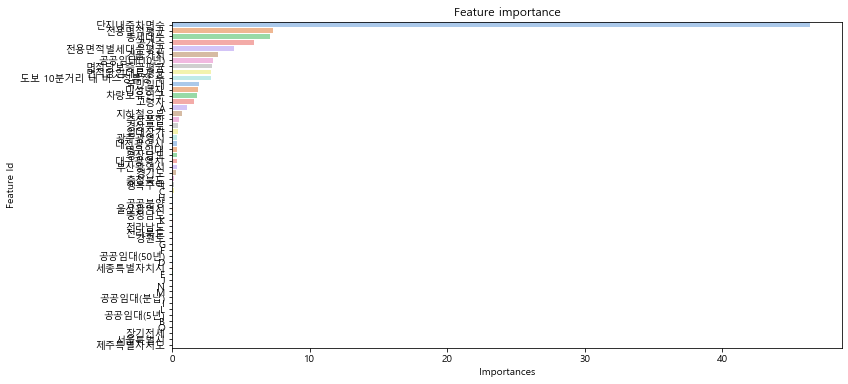

In [65]:
# 모델 변수 중요도 시각화
#plt.rc('font', family='NanumGothic')


cbr_pred = cbr.predict(x_test, verbose=True)
df_feature_importance = pd.DataFrame(cbr.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
feature_plot2= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="pastel");
plt.title('Feature importance');

In [66]:
submission=pd.read_csv("C:/Users/LG/Desktop/sample_submission.csv")

In [67]:
submission['num'] = cbr_pred
submission.to_csv('C:/Users/LG/Desktop/submission.csv', index=False)


#데이콘 결과: (public) 99.6621638787 (private) 107.6953571639

In [156]:
#더미변수 고민해보기

x_train.head()

,총세대수,공가수,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,단지내주차면수,지하철유무,도보 10분거리 내 버스정류장 수,건물가치,전용면적평균,전용면적별세대수평균,면적당보증금평균,면적당임대료평균,공공임대(10년),공공임대(50년),공공임대(5년),공공임대(분납),국민임대,영구임대,임대상가,장기전세,행복주택,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,545.0,17.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,624.0,0,3,2543616000,44.345714,77.857143,369723.800809,3084.233449,0,0,0,0,7,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1216.0,13.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1285.0,1,1,4498560000,41.253636,110.545455,670795.282442,4243.676268,0,0,0,0,11,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,755.0,6.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,734.0,1,3,1872840000,50.510000,125.833333,442099.439591,3690.264516,0,0,0,0,6,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
3,696.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,645.0,0,2,2739420000,42.982500,174.000000,401127.756990,2795.712287,0,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,566.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,517.0,0,6,2763450000,42.575000,94.333333,398960.302187,2798.278793,0,0,0,0,6,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
